In [1]:
%load_ext autoreload
%autoreload 2

In [23]:
import sys

from paittern.contouring import trainer2, model

BUCKET_NAME='wagon-bootcamp-paittern'

X_train = trainer2.get_data('image', BUCKET_NAME)
Y_train = trainer2.get_data('mask', BUCKET_NAME) 
print("get_data réalisé")
n = 1000
X_train = trainer2.load_data(X_train, n, BUCKET_NAME, 3)
y_train = trainer2.load_data(Y_train, n, BUCKET_NAME, 0)
#print(X_train.shape, y_train.shape)

print("Création d'un validation set")
X_val = X_train[round(0.8*n):]
y_val = y_train[round(0.8*n):]

X_train = X_train[:round(0.8*n)]
y_train = y_train[:round(0.8*n)]

get_data réalisé
Création d'un validation set


In [24]:
memroy_used = sys.getsizeof(X_train)+sys.getsizeof(Y_train)+sys.getsizeof(y_train)+sys.getsizeof(X_val)+sys.getsizeof(y_val)



In [25]:
memroy_used/95400000

0.0026649056603773587

In [26]:
X_train.dtype

dtype('uint8')

In [27]:
y_train.dtype

dtype('uint8')

In [28]:
model2 = model.deeplabv3_plus((512,512,3))

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Recall, Precision

In [30]:
lr = 0.1

In [31]:
from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss

In [32]:
model2.compile('Adam', loss=bce_jaccard_loss, metrics=Precision())

In [33]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')
X_val = X_val.astype('float32')
y_val = y_val.astype('float32')

In [ ]:
model2.fit(X_train, y_train,
          epochs=10,
          validation_data = (X_val, y_val),
          )

Epoch 1/10


In [ ]:
import joblib

In [ ]:
joblib.dump(model2, 'my_trained_model2.joblib')

In [1]:
X_train

NameError: name 'X_train' is not defined

In [2]:
import tensorflow as tf

a = tf.constant([[1, 2], [3, 4]])                 
b = tf.add(a, 1)

2022-03-07 09:24:52.663548: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
type(a)

tensorflow.python.framework.ops.EagerTensor

In [4]:
type(a.numpy())

numpy.ndarray

In [5]:
!cwd

zsh:1: command not found: cwd


In [6]:
!pwd

/Users/humbert/code/MarineThierry/paittern/notebooks


In [7]:
import tensorflow as tf

In [102]:
from tensorflow.keras.utils import CustomObjectScope

In [99]:
def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)

In [104]:
with CustomObjectScope({'iou': iou, 'dice_coef': dice_coef, 'dice_loss': dice_loss}):
        model = tf.keras.models.load_model("/Users/humbert/code/MarineThierry/paittern/model.h5")

In [105]:
model.history

In [20]:
import cv2
import matplotlib.pyplot as plt

In [71]:
image = cv2.imread(
    "/Users/humbert/code/MarineThierry/paittern/people_segmentation/images/pexels-photo-769036.jpg",)

In [72]:
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

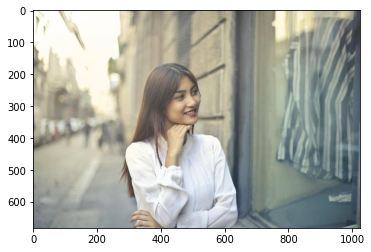

In [73]:
plt.imshow(image)

In [106]:
resized_image = cv2.resize(image, (512,512))

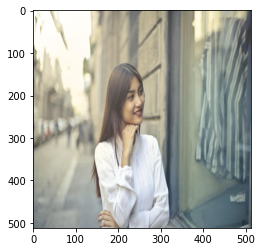

In [107]:
plt.imshow(resized_image)

In [88]:
import numpy as np

In [108]:
y_pred = model.predict(np.expand_dims(resized_image, axis = 0))

In [91]:
y_pred = y_pred[0]

In [114]:
y_pred_masked = np.where(y_pred>0.5, 1, 0)

In [115]:
np.unique(y_pred_masked, return_counts=True)

(array([0, 1]), array([118289, 143855]))

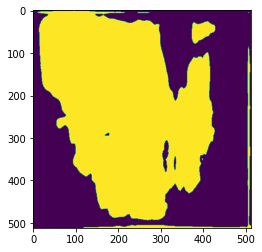

In [116]:
plt.imshow(y_pred[0])

In [117]:
import glob as glob

In [118]:
def get_data(objet, bucket_name):
    """Returns the blobs for images and masks"""

    client = storage.Client()
    blobs = client.list_blobs(bucket_name)

    data = [blob.name for blob in blobs if str(blob.name).startswith(f"{BUCKET_FOLDER3}/{BUCKET_FOLDER3}/{objet}")]

    return data

def load_data(data, nb, bucket_name, dim):
    bucket = storage.Client().get_bucket(bucket_name)
    my_list = []
    for name in data[:nb]:
        blob = bucket.blob(name)
        obj = np.array(
        cv2.imdecode(
            np.asarray(bytearray(blob.download_as_string()), dtype=np.uint8), dim
        ))
        my_list.append(obj)
    return np.array(my_list)

In [119]:
# project id - replace with your GCP project id
PROJECT_ID='wagon-bootcamp-336718'

# bucket name - replace with your GCP bucket name
BUCKET_NAME='wagon-bootcamp-paittern'
BUCKET_FOLDER='people_segmentation'
BUCKET_FOLDER2='augmented_data'
BUCKET_FOLDER3='new_data'
LOCAL_PATH = '/Users/humbert/Documents/Human-Image-Segmentation-with-DeepLabV3Plus-in-TensorFlow-main/people_segmentation/*'
LOCAL_PATH2 = '/Users/humbert/Documents/Human-Image-Segmentation-with-DeepLabV3Plus-in-TensorFlow-main/new_data/*'


In [142]:
X_train = get_data('image', BUCKET_NAME)
Y_train = get_data('mask', BUCKET_NAME)

In [121]:
from google.cloud import storage

In [123]:
import random

In [129]:
X_train[nb]

'new_data/new_data/image/pexels-photo-141376_0.png'

In [143]:
n = 3000
X_train = load_data(X_train, n, BUCKET_NAME, 3)
y_train = load_data(Y_train, n, BUCKET_NAME, 0)

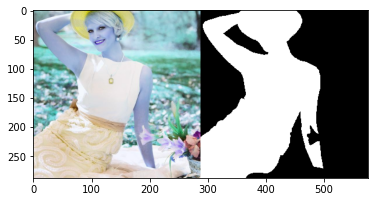

In [169]:
nb = random.randint(0,n)
y = np.expand_dims(y_train[nb], axis = -1)
y.shape
plt.imshow(np.concatenate([X_train[nb], np.concatenate([y, y, y], axis = -1)*255], axis = 1))

In [214]:
smooth = 1e-15
def dice_coef(y_true, y_pred):
    y_pred = np.where(y_pred.numpy()>0.5, 1, 0).astype("uint8")
    y_true = np.where(y_true.numpy()>0.5, 1, 0).astype("uint8")
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * int(intersection) + smooth) / (int(tf.reduce_sum(y_true)) + int(tf.reduce_sum(y_pred)) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef(y_true, y_pred)

In [218]:
c = tf.constant([[1., 1.], [1., 0.], [0., 0.]])

d = tf.constant([[0.3, 0.4], [0.7, 0.9], [0.2, 0.1]])

dice_coef(d,c), dice_loss(d,c)

tf.Tensor(2, shape=(), dtype=uint8)
tf.Tensor(2, shape=(), dtype=uint8)


(0.40000000000000013, 0.5999999999999999)

In [219]:
smooth = 1e-15
def dice_coef2(y_true, y_pred):
    y_pred = y_pred.numpy().astype("float32")
    y_true = y_true.numpy().astype("float32")
    y_true = tf.keras.layers.Flatten()(y_true)
    y_pred = tf.keras.layers.Flatten()(y_pred)
    intersection = tf.reduce_sum(y_true * y_pred)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true) + tf.reduce_sum(y_pred) + smooth)

def dice_loss(y_true, y_pred):
    return 1.0 - dice_coef2(y_true, y_pred)

In [220]:
c = tf.constant([[1., 1.], [1., 0.], [0., 0.]])

d = tf.constant([[0.3, 0.4], [0.7, 0.9], [0.2, 0.1]])

dice_coef(d,c), dice_loss(d,c)

tf.Tensor(2, shape=(), dtype=uint8)


(0.40000000000000013, <tf.Tensor: shape=(), dtype=float32, numpy=0.5>)